In [1]:
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import nltk
import re
import operator
import sklearn

In [2]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time


import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hechen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path ='./datasets_coursework/IMDb/dev/imdb_dev_pos.txt'
dataset = pd.read_csv(path,sep='\n',header=None)  
df = dataset[0]
print(dataset.shape[0],dataset.shape[1])
#dataset.head()

2518 1


In [8]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df = df.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [10]:
!python -m spacy download en # one time run
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output


    Linking successful
    /Users/hechen/anaconda3/envs/r_tutorial/lib/python3.7/site-packages/en_core_web_sm
    -->
    /Users/hechen/anaconda3/envs/r_tutorial/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [11]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['this', 'is,', 'without', 'doubt,', 'one', 'favorite', 'columbo', 'episodes', 'ever.', 'the', 'acting', 'well', 'done,', 'music', 'catchy,', 'script', 'ingenious,', 'direction', 'fabulous.<br', '/><br', '/>peter', 'falk,', 'acts', 'brilliantly', 'every', 'columbo', 'episodes,', 'acts', 'particularly', 'well', 'episode.<br', '/><br', '/>also,', 'great', 'performances', 'stephen', 'caffrey,', 'gary', 'hershberger,', 'alan', 'fudge', 'robert', 'culp.<br', '/><br', '/>the', 'ending', 'absolutely', 'brilliant', 'love', 'way', 'columbo', 'describes', 'it.<br', '/><br', '/>this', 'columbo', 'movie', "won't,", 'amiss.']


In [12]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['doubt', 'favorite', 'columbo', 'episode', 'acting', 'music', 'catchy', 'script', 'ingenious', 'direction', 'fabulous.<br', '/>peter', 'falk', 'columbo', 'episode', 'episode.<br', 'great', 'performance', 'caffrey', 'gary', 'hershberger', 'alan', 'fudge', 'robert', 'culp.<br', 'brilliant', 'love', 'way', 'columbo', 'it.<br', 'columbo', 'movie', 'amiss']


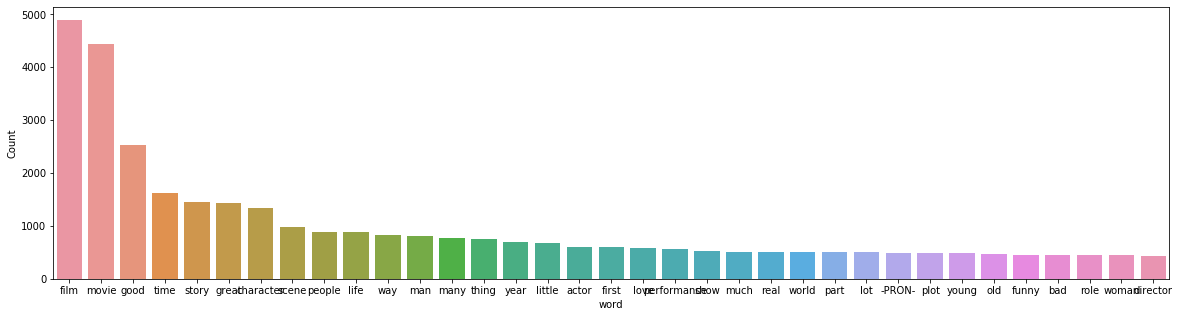

In [13]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35) 

In [14]:
dictionary = corpora.Dictionary(reviews_2) 

In [15]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                                   id2word=dictionary,
                                   num_topics=7, 
                                   random_state=100,
                                   chunksize=1000,
                                   passes=50)

In [16]:
lda_model.print_topics() 

[(0,
  '0.021*"show" + 0.015*"episode" + 0.011*"series" + 0.009*"season" + 0.006*"great" + 0.005*"good" + 0.005*"game" + 0.004*"time" + 0.004*"alien" + 0.003*"bill"'),
 (1,
  '0.006*"fulci" + 0.004*"killer" + 0.003*"cell" + 0.003*"monkee" + 0.003*"image" + 0.003*"boy" + 0.003*"amir" + 0.003*"babette" + 0.003*"serial" + 0.003*"gore"'),
 (2,
  '0.053*"movie" + 0.018*"film" + 0.015*"good" + 0.014*"great" + 0.010*"story" + 0.010*"time" + 0.007*"character" + 0.006*"scene" + 0.006*"way" + 0.005*"people"'),
 (3,
  '0.028*"movie" + 0.022*"good" + 0.022*"film" + 0.011*"time" + 0.010*"character" + 0.008*"great" + 0.006*"story" + 0.006*"scene" + 0.005*"people" + 0.005*"funny"'),
 (4,
  '0.010*"batman" + 0.007*"ray" + 0.006*"park" + 0.005*"eastwood" + 0.005*"dinosaur" + 0.003*"radio" + 0.003*"barry" + 0.003*"spade" + 0.003*"clint" + 0.003*"south"'),
 (5,
  '0.036*"film" + 0.008*"story" + 0.007*"time" + 0.007*"life" + 0.006*"character" + 0.006*"good" + 0.006*"movie" + 0.006*"man" + 0.005*"scene" + 

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis 

/Users/hechen/anaconda3/envs/r_tutorial/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.194678  0.022204       1        1  39.225105
3      0.217523  0.008927       2        1  28.765232
2      0.211580  0.036771       3        1  21.025728
0     -0.073700 -0.235851       4        1   4.670722
4     -0.191116  0.059071       5        1   2.767658
1     -0.188208  0.088551       6        1   2.642307
6     -0.170757  0.020328       7        1   0.903253, topic_info=     Category         Freq         Term        Total  loglift  logprob
95    Default  4117.000000        movie  4117.000000  30.0000  30.0000
989   Default   457.000000         show   457.000000  29.0000  29.0000
27    Default  2356.000000         good  2356.000000  28.0000  28.0000
91    Default  1339.000000        great  1339.000000  27.0000  27.0000
84    Default   205.000000      episode   205.000000  26.0000  26.0000
...       ...          ...          ...          ...      ...      ...
2177   Topic7     3.453215    professor    22.667065   2.8253  -6.2223
4062   Topic7     3.610288       energy    32.510216   2.5092  -6.1778
383    Topic7     3.924524  documentary   111.862236   1.3569  -6.0944
761    Topic7     3.392329         song   184.935226   0.7084  -6.2401
425    Topic7     3.049082          dvd   320.877991   0.0507  -6.3468

[474 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
0          1  0.547636  -PRON-
0          2  0.240530  -PRON-
0          3  0.188988  -PRON-
0          4  0.023624  -PRON-
10659      6  0.782554       _
...      ...       ...     ...
72         3  0.292962    year
72         4  0.025805    year
188        1  0.576436   young
188        2  0.144633   young
188        3  0.276689   young

[785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 1, 5, 2, 7])